<ipython-input-2-1b7f02a6045a>:20: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(utilization_model, years, utilization, p0=[50, 0.1, 10])


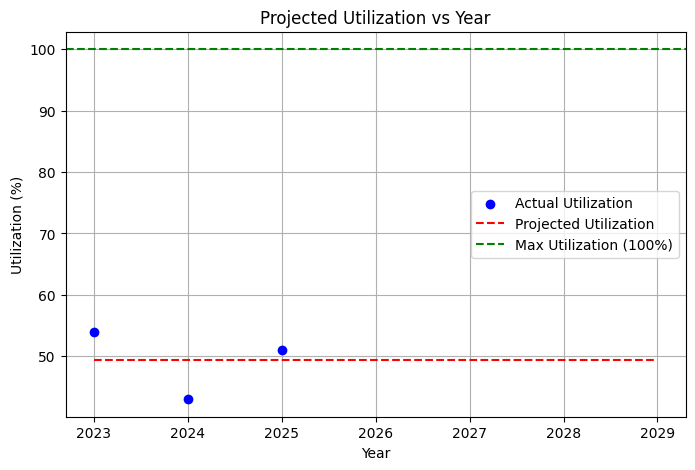

In [ ]:
# Extrapolate utilization data to predict plateau point

import pandas as pd
from scipy.optimize import curve_fit

# Define a function to model and predict utilization
def utilization_model(x, a, b, c):
    return a * np.exp(-b * x) + c

# Data provided
years = np.array([2023, 2024, 2025])
tanks_produced = np.array([405733, 320524, 88403])
utilization = np.array([54, 43, 51])  # in percentage
sales = np.array([285484, 207916, 68348])

# Future years for extrapolation
future_years = np.arange(2023, 2030)

# Fit the model to the existing data
params, covariance = curve_fit(utilization_model, years, utilization, p0=[50, 0.1, 10])

# Predict utilization for future years
predicted_utilization = utilization_model(future_years, *params)

# Plot actual and predicted utilization
plt.figure(figsize=(8, 5))
plt.scatter(years, utilization, color='blue', label='Actual Utilization', zorder=3)
plt.plot(future_years, predicted_utilization, linestyle='--', color='red', label='Projected Utilization')

# Add max utilization line
max_utilization = (750000 / 750000) * 100  # 100% utilization threshold
plt.axhline(y=max_utilization, color='green', linestyle='--', label='Max Utilization (100%)')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Utilization (%)')
plt.title('Projected Utilization vs Year')
plt.legend()
plt.grid()

# Show the plot
plt.show()

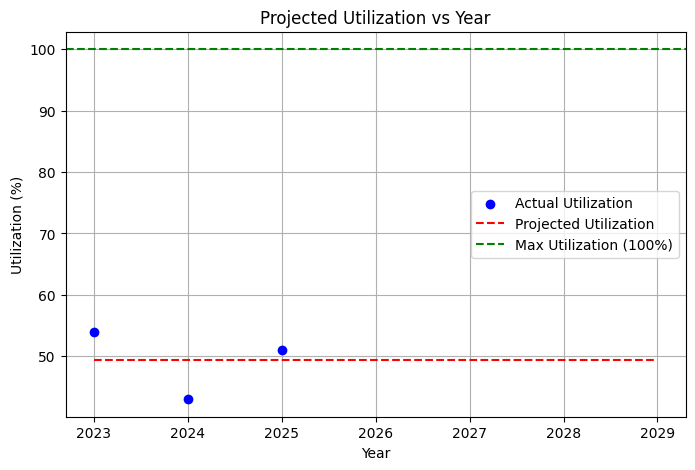

In [ ]:
# Re-attempting the plot

# Create a new figure
plt.figure(figsize=(8, 5))

# Scatter plot for actual utilization data
plt.scatter(years, utilization, color='blue', label='Actual Utilization', zorder=3)

# Line plot for predicted utilization
plt.plot(future_years, predicted_utilization, linestyle='--', color='red', label='Projected Utilization')

# Add max utilization line
plt.axhline(y=100, color='green', linestyle='--', label='Max Utilization (100%)')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Utilization (%)')
plt.title('Projected Utilization vs Year')
plt.legend()
plt.grid()

# Show the plot
plt.show()

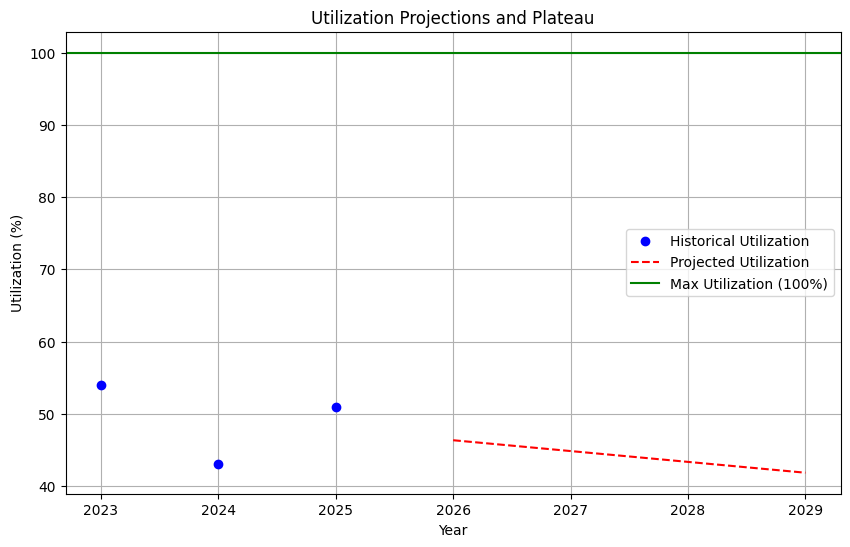

Projections saved to 'utilization_projections.csv'.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Historical data
years = np.array([2023, 2024, 2025]).reshape(-1, 1)
utilization = np.array([54, 43, 51])  # Utilization in percentage

# Linear Regression for projection
model = LinearRegression()
model.fit(years, utilization)

# Future projections
future_years = np.arange(2026, 2030).reshape(-1, 1)
future_utilization = model.predict(future_years)

# Combining historical and projected data
all_years = np.append(years, future_years).reshape(-1, 1)
all_utilization = np.append(utilization, future_utilization)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(years, utilization, 'o', label="Historical Utilization", color='blue')
plt.plot(future_years, future_utilization, '--', label="Projected Utilization", color='red')
plt.axhline(y=100, color='green', linestyle='-', label="Max Utilization (100%)")
plt.title("Utilization Projections and Plateau")
plt.xlabel("Year")
plt.ylabel("Utilization (%)")
plt.legend()
plt.grid()
plt.show()

# Create a DataFrame for output
data = {
    "Year": np.append(years.flatten(), future_years.flatten()),
    "Utilization (%)": np.round(all_utilization, 2)
}
df = pd.DataFrame(data)

# Save the projections to a CSV file
df.to_csv("utilization_projections.csv", index=False)
print("Projections saved to 'utilization_projections.csv'.")

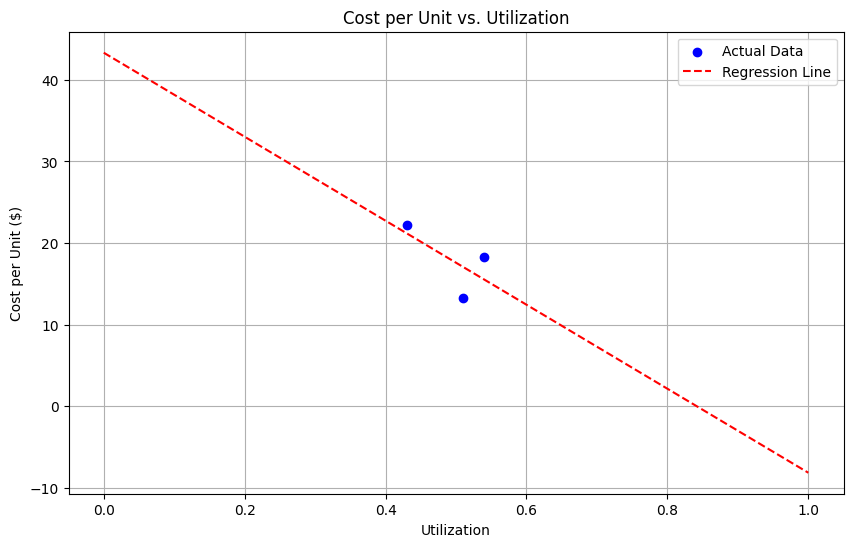

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
years = np.array([2023, 2024, 2025])
utilization = np.array([0.54, 0.43, 0.51])
cost_per_unit = np.array([18.27, 22.22, 13.32])

# Reshape data for regression
utilization_reshaped = utilization.reshape(-1, 1)

# Perform linear regression
model = LinearRegression()
model.fit(utilization_reshaped, cost_per_unit)

# Predict cost per unit for a range of utilization values
utilization_range = np.linspace(0, 1, 100).reshape(-1, 1)
predicted_cost = model.predict(utilization_range)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(utilization, cost_per_unit, color='blue', label='Actual Data')
plt.plot(utilization_range, predicted_cost, color='red', linestyle='--', label='Regression Line')
plt.xlabel('Utilization')
plt.ylabel('Cost per Unit ($)')
plt.title('Cost per Unit vs. Utilization')
plt.legend()
plt.grid(True)
plt.show()

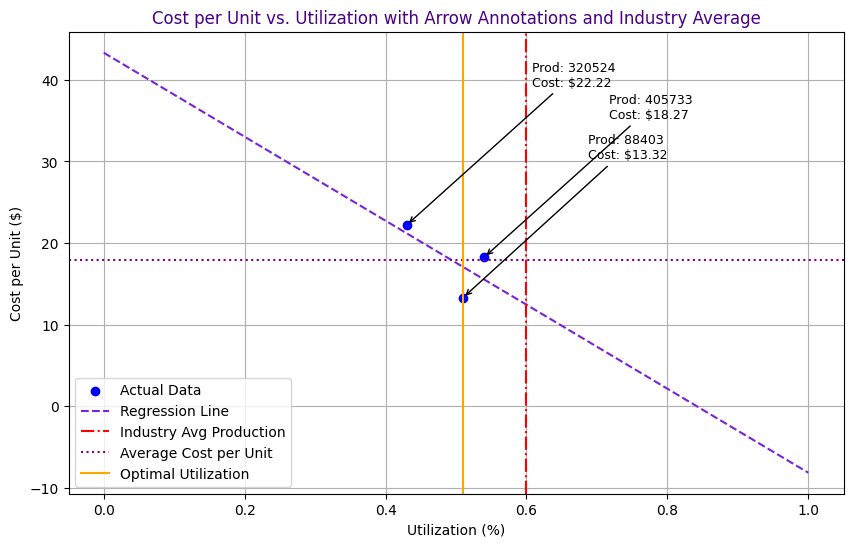

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

colors = ['#7923DC', '#B45DE4', '#FFcdFF', '#f89dcf', '#0072B2', '#D55E00']

# Data: Production, Utilization, and Cost per Unit
production = np.array([405733, 320524, 88403])
utilization = np.array([0.54, 0.43, 0.51])
cost_per_unit = np.array([18.27, 22.22, 13.32])

# Factory's maximum annual capacity
max_capacity = 750000

# Industry average production (as a fraction of your factory's max utilization)
industry_average_production = 0.6 * max_capacity  # Assuming 60% utilization in the industry

# Fit a linear regression model to the data
model = LinearRegression()
X = utilization.reshape(-1, 1)
model.fit(X, cost_per_unit)

# Generate utilization values for prediction
utilization_range = np.linspace(0, 1, 100).reshape(-1, 1)
predicted_cost = model.predict(utilization_range)

# Determine the utilization cap to minimize costs
optimal_utilization = utilization[np.argmin(cost_per_unit)]

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of actual data points
plt.scatter(utilization, cost_per_unit, color='blue', label='Actual Data')

# Annotate each data point with arrows
for i in range(len(production)):
    plt.annotate(f'Prod: {production[i]}\nCost: ${cost_per_unit[i]:.2f}',
                 (utilization[i], cost_per_unit[i]),
                 textcoords="offset points",
                 xytext=(90, 100),
                 arrowprops=dict(arrowstyle="->", color='black'),
                 fontsize=9)

# Plot the regression line with the specified color
plt.plot(utilization_range, predicted_cost, color=colors[0], linestyle='--', label='Regression Line')

# Plot the industry average production line
plt.axvline(x=industry_average_production / max_capacity, color='red', linestyle='-.', label='Industry Avg Production')

# Plot the horizontal average line for optimal utilization
plt.axhline(y=cost_per_unit.mean(), color='purple', linestyle=':', label='Average Cost per Unit')

# Highlight the optimal utilization point
plt.axvline(x=optimal_utilization, color='orange', linestyle='-', label='Optimal Utilization')

# Labels and title
plt.xlabel('Utilization (%)')
plt.ylabel('Cost per Unit ($)')
plt.title('Cost per Unit vs. Utilization with Arrow Annotations and Industry Average',color='#4B0082' )
plt.legend(loc='lower left')
plt.grid(True)

# Display the plot
plt.show()

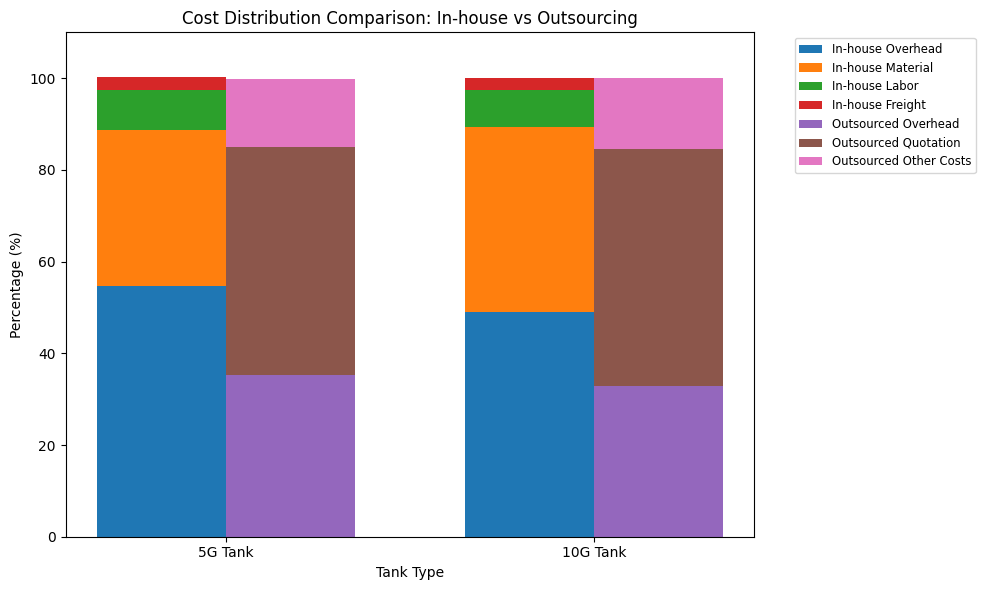

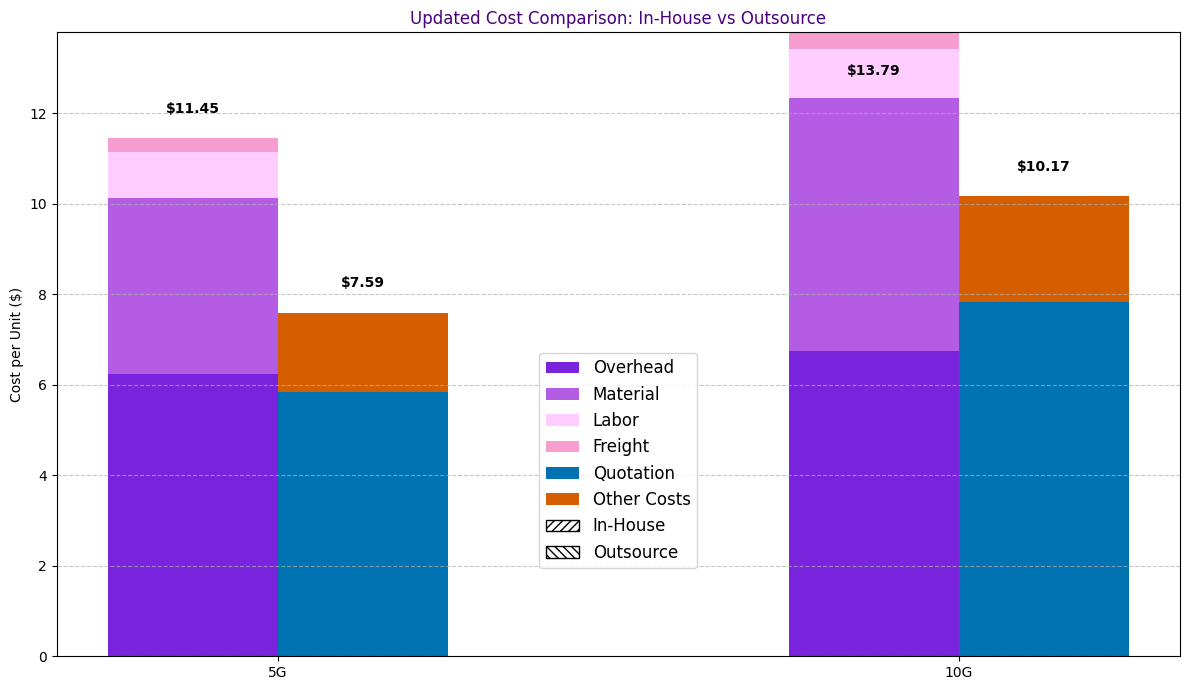

In [ ]:
# Updated Data
# Ensure these numbers match the updated screenshot for accuracy
categories = ['Overhead', 'Material', 'Labor', 'Freight', 'Quotation', 'Other Costs']

# Updated costs for in-house and outsourcing
in_house_5g = [6.24, 3.89, 1.01, 0.31, 0, 0]  # Update these numbers as per the new data
in_house_10g = [6.75, 5.58, 1.09, 0.37, 0, 0]  # Update these numbers as per the new data
outsource_5g = [0, 0, 0, 0, 5.84, 1.75]  # Update these numbers as per the new data
outsource_10g = [0, 0, 0, 0, 7.82, 2.35]  # Update these numbers as per the new data

# Total costs for annotations
in_house_5g_total = sum(in_house_5g)
in_house_10g_total = sum(in_house_10g)
outsource_5g_total = sum(outsource_5g)
outsource_10g_total = sum(outsource_10g)

# Visualize updated costs
import matplotlib.pyplot as plt
import numpy as np

# Bar positions
x = np.arange(2)  # Two categories: 5G and 10G
bar_width = 0.25

# Using a colorblind-friendly and aesthetically pleasing palette
colors = ['#7923DC', '#B45DE4', '#FFcdFF', '#f89dcf', '#0072B2', '#D55E00']

# Creating stacked bars
fig, ax = plt.subplots(figsize=(12, 7))

# Plot in-house costs
in_house_bars = np.array([0.0, 0.0])  # Changed to float
for i, cost in enumerate(in_house_5g):
    ax.bar(
        x - bar_width / 2,
        [in_house_5g[i], in_house_10g[i]],
        bar_width,
        #label=f'In-House: {categories[i]}', # Removed individual labels
        bottom=in_house_bars,
        color=colors[i]
    )
    in_house_bars += np.array([in_house_5g[i], in_house_10g[i]])

# Plot outsource costs
outsource_bars = np.array([0.0, 0.0])  # Changed to float to match the data type
for i, cost in enumerate(outsource_5g):
    ax.bar(
        x + bar_width / 2,
        [outsource_5g[i], outsource_10g[i]],
        bar_width,
        #label=f'Outsource: {categories[i]}', # Removed individual labels
        bottom=outsource_bars,
        color=colors[i]
    )
    outsource_bars += np.array([outsource_5g[i], outsource_10g[i]])

# Adding total cost annotations with better formatting
ax.text(-bar_width / 2, in_house_5g_total + 0.5, f'${in_house_5g_total:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
ax.text(-bar_width / 2 + 1, in_house_10g_total - 1, f'${in_house_10g_total:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold') # Adjusted vertical offset
ax.text(bar_width / 2, outsource_5g_total + 0.5, f'${outsource_5g_total:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
ax.text(bar_width / 2 + 1, outsource_10g_total + 0.5, f'${outsource_10g_total:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adding labels, title, and a simplified legend
ax.set_xticks(x)
ax.set_xticklabels(['5G', '10G'])
ax.set_ylabel('Cost per Unit ($)')
ax.set_title('Updated Cost Comparison: In-House vs Outsource', color='#4B0082')

# Simplified legend with proxy artists
from matplotlib.patches import Patch # Import Patch for creating proxy artists
legend_elements = [
    Patch(facecolor=colors[i], label=categories[i]) for i in range(len(categories))
]
legend_elements.extend([
    Patch(facecolor='white', edgecolor='black', hatch='////', label='In-House'),  # Proxy artist for In-House
    Patch(facecolor='white', edgecolor='black', hatch='\\\\\\\\', label='Outsource') # Proxy artist for Outsource
])
ax.legend(handles=legend_elements,
          bbox_to_anchor=(0.5, 0.5), # Experiment with these coordinates
          loc='upper center', # You might adjust 'loc' as needed
          fontsize=12)

ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

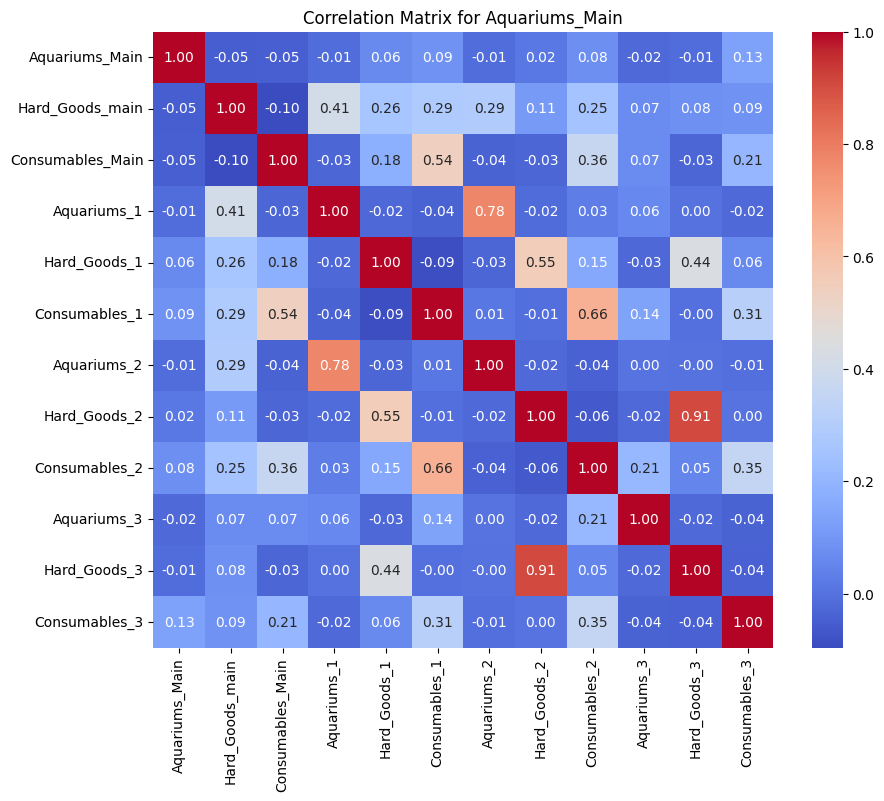

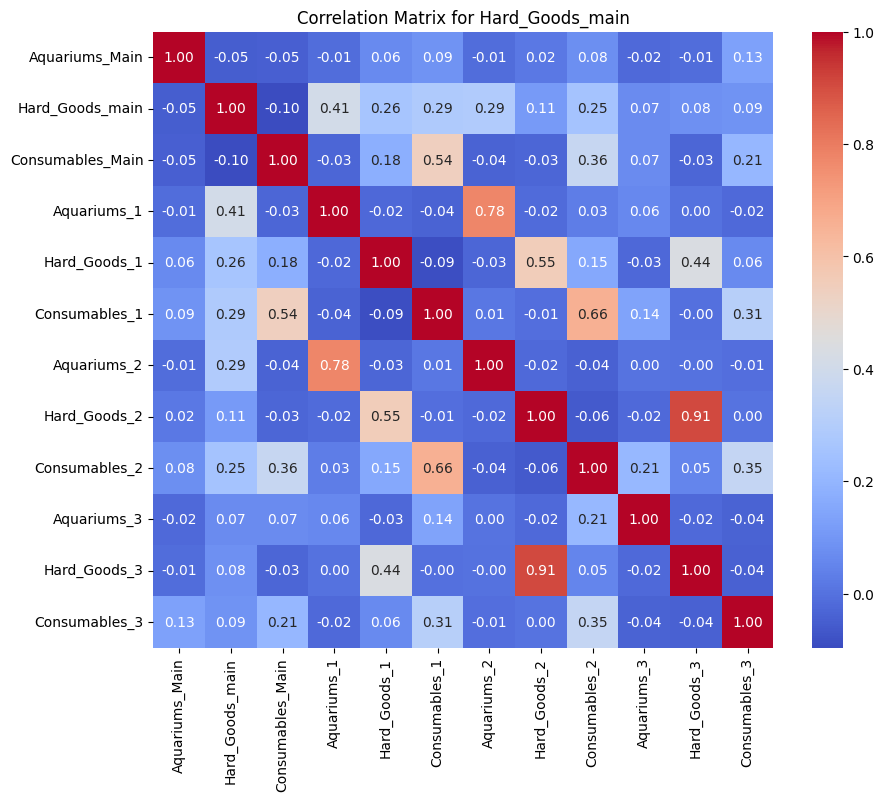

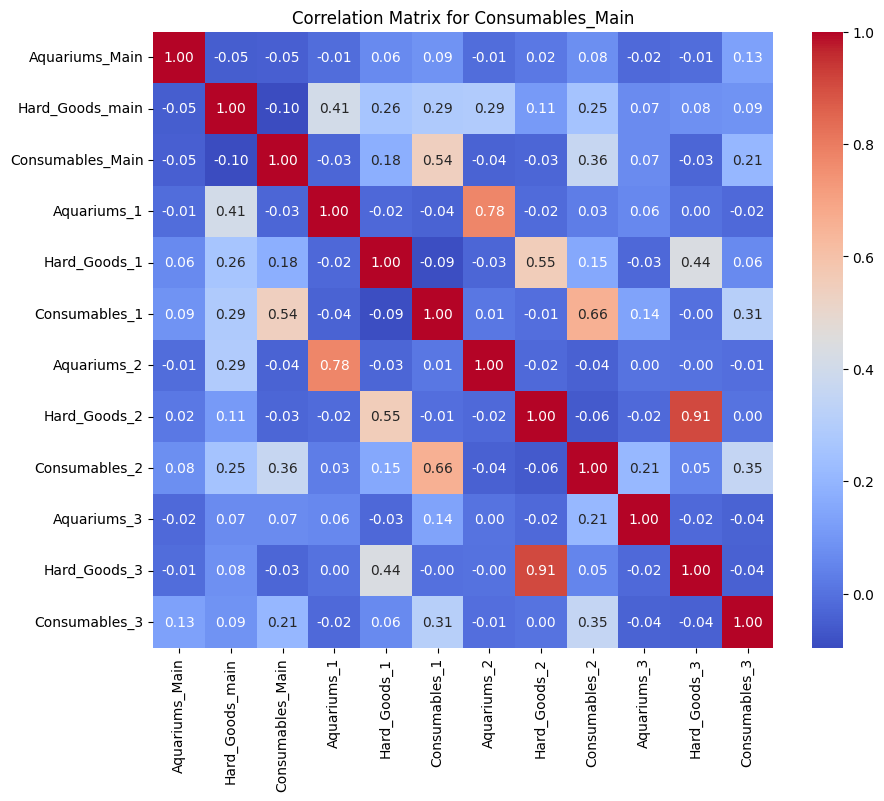

In [ ]:
# prompt: find correlation of "Aquariums_Main",
#     "Hard_Goods_main",
#     "Consumables_Main" "Aquariums_1",
#     "Hard_Goods_1",
#     "Consumables_1",
#     "Aquariums_2",
#     "Hard_Goods_2",
#     "Consumables_2",
#     "Aquariums_3",
#     "Hard_Goods_3",
#     "Consumables_3" with  from refined_tomodel.csv file, create 1 correlation matrix per "Aquariums_Main", "Hard_Goods_main", "Consumables_Main"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('refined_tomodel.csv')
except FileNotFoundError:
    print("Error: 'refined_tomodel.csv' not found. Please upload the file to your environment.")
    exit()  # Exit the script if the file is not found

# Define the columns for correlation analysis
columns_to_correlate = [
    "Aquariums_Main",
    "Hard_Goods_main",
    "Consumables_Main",
    "Aquariums_1",
    "Hard_Goods_1",
    "Consumables_1",
    "Aquariums_2",
    "Hard_Goods_2",
    "Consumables_2",
    "Aquariums_3",
    "Hard_Goods_3",
    "Consumables_3"
]


# Check if all columns exist in the DataFrame
missing_columns = set(columns_to_correlate) - set(df.columns)
if missing_columns:
  print(f"Error: The following columns are missing from the DataFrame: {missing_columns}")
  exit()

# Create correlation matrices for each main category
main_categories = ["Aquariums_Main", "Hard_Goods_main", "Consumables_Main"]
for category in main_categories:
  correlation_matrix = df[columns_to_correlate].corr()

  # Plotting the correlation matrix as a heatmap
  plt.figure(figsize=(10, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
  plt.title(f"Correlation Matrix for {category}")
  plt.show()


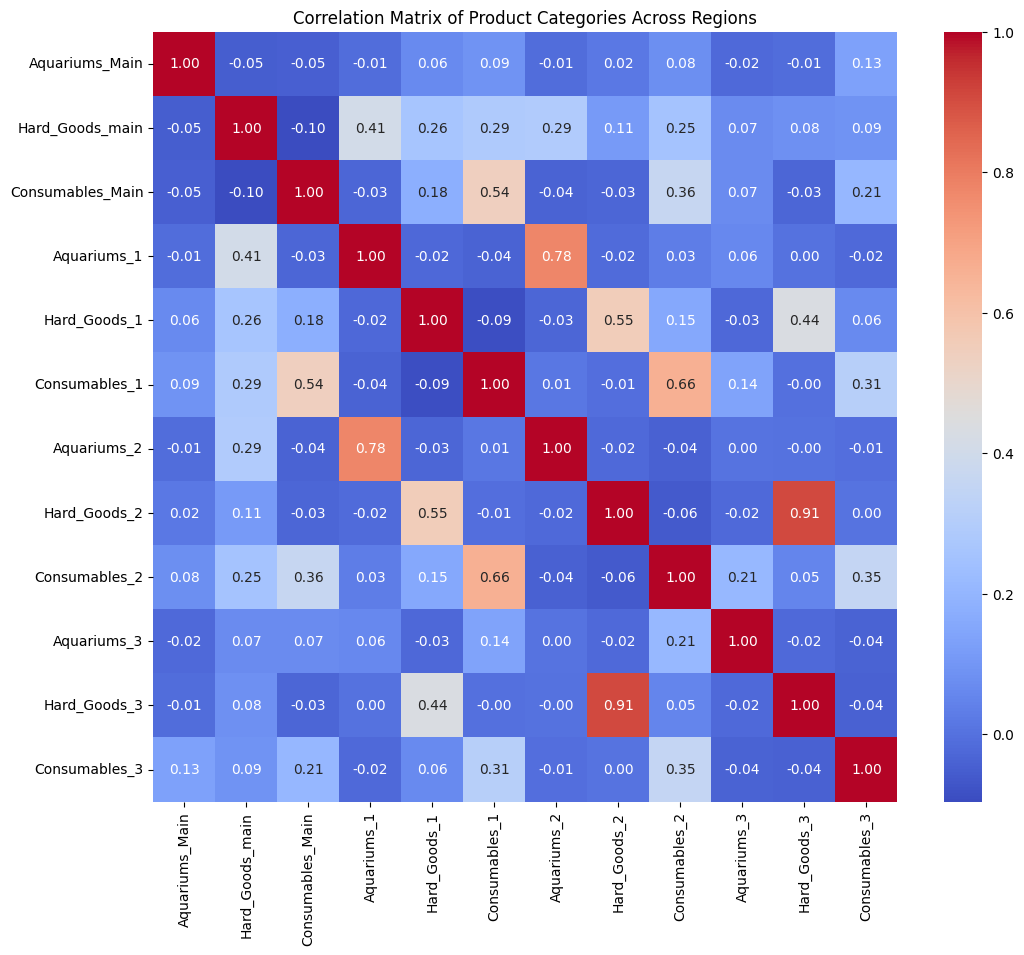

In [ ]:
# prompt: create a heatmap from the previous code block

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'correlation_matrix' from the previous code block is available

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Product Categories Across Regions')
plt.show()


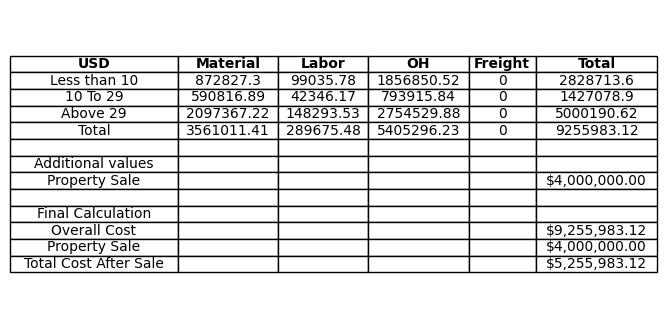

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define cost breakdown for Year 1
data = {
    "USD": ["Less than 10", "10 To 29", "Above 29", "Total"],
    "Material": [872827.30, 590816.89, 2097367.22, 3561011.41],
    "Labor": [99035.78, 42346.17, 148293.53, 289675.48],
    "OH": [1856850.52, 793915.84, 2754529.88, 5405296.23],
    "Freight": [0, 0, 0, 0],
    "Total": [2828713.60, 1427078.90, 5000190.62, 9255983.12]
}

# Create DataFrame
df = pd.DataFrame(data)

# Additional values
property_sale = 4000000.00

# Final Calculation
overall_cost = df["Total"].iloc[-1]
total_cost_after_sale = overall_cost - property_sale

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis("tight")
ax.axis("off")

# Create table data
table_data = [
    ["USD", "Material", "Labor", "OH", "Freight", "Total"]
] + df.values.tolist()

# Additional values section
table_data.append(["", "", "", "", "", ""])
table_data.append(["Additional values", "", "", "", "", ""])
table_data.append(["Property Sale", "", "", "", "", f"${property_sale:,.2f}"])

# Final Calculation section
table_data.append(["", "", "", "", "", ""])
table_data.append(["Final Calculation", "", "", "", "", ""])
table_data.append(["Overall Cost", "", "", "", "", f"${overall_cost:,.2f}"])
table_data.append(["Property Sale", "", "", "", "", f"${property_sale:,.2f}"])
table_data.append(["Total Cost After Sale", "", "", "", "", f"${total_cost_after_sale:,.2f}"])

# Create the table
table = ax.table(cellText=table_data, colLabels=None, cellLoc="center", loc="center")

# Format the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2, 3, 4, 5])

# Make header row bold
for (i, key) in enumerate(table_data[0]):
    table[0, i].set_text_props(weight='bold')

# Show plot
plt.show()

In [ ]:
!pip install matplotlib pandas waterfall_chart

ERROR: Could not find a version that satisfies the requirement waterfall_chart (from versions: none)
ERROR: No matching distribution found for waterfall_chart


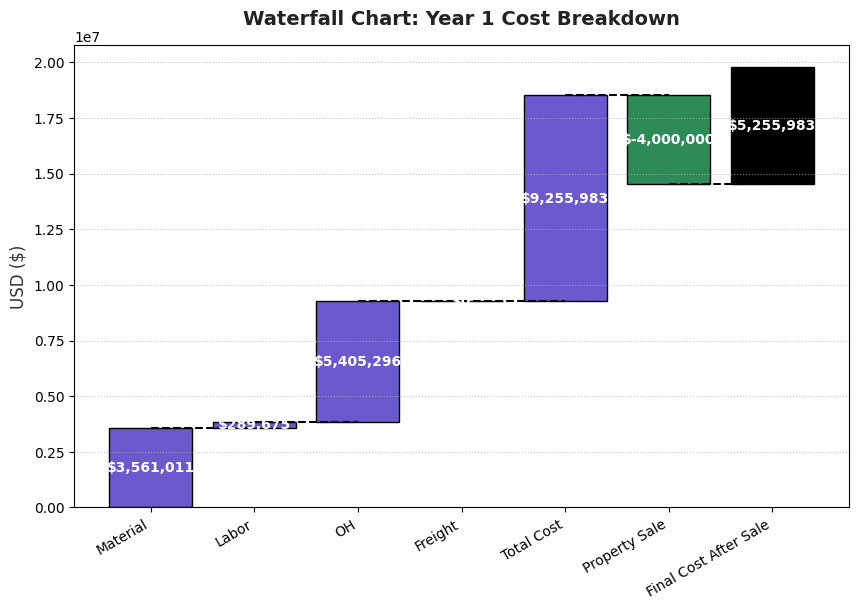

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define categories and values
categories = ["Material", "Labor", "OH", "Freight", "Total Cost", "Property Sale", "Final Cost After Sale"]
values = [3561011.41, 289675.48, 5405296.23, 0, 9255983.12, -4000000.00, 5255983.12]

# Calculate cumulative values
cumulative_values = np.zeros(len(values))
cumulative_values[1:] = np.cumsum(values[:-1])

# Define colors: expenses in purple, property sale reduction in green, final cost in black
colors = ["#6A5ACD", "#6A5ACD", "#6A5ACD", "#6A5ACD", "#6A5ACD", "#2E8B57", "black"]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
for i in range(len(categories)):
    ax.bar(categories[i], values[i], bottom=cumulative_values[i], color=colors[i], edgecolor='black')

# Draw horizontal lines for connecting steps
for i in range(len(categories) - 1):
    ax.plot([i, i+1], [cumulative_values[i+1], cumulative_values[i+1]], color='black', linestyle="dashed")

# Labels and Title
ax.set_ylabel("USD ($)", fontsize=12, color='#333333')
ax.set_title("Waterfall Chart: Year 1 Cost Breakdown", fontsize=14, fontweight='bold', color='#222222', pad=15)

# Display values on bars
for i in range(len(categories)):
    y_position = cumulative_values[i] + (values[i] / 2 if values[i] != 0 else 0)
    ax.text(i, y_position, f'${values[i]:,.0f}', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Adjust layout
plt.xticks(rotation=30, ha="right")
plt.grid(axis='y', linestyle="dotted", alpha=0.7)
plt.show()